# Symbol Graph Provider Demo

This notebook demonstrates construction and visualization of symbol graphs.

In [1]:
from app.extensions.context_providers.symbol_graph_provider import SymbolGraphProvider

provider = SymbolGraphProvider("sample_module.py")
ctx = provider.get_context()
graph = ctx["symbol_graph"]
graph.keys()

dict_keys(['sample_module.foo', 'sample_module.Bar', 'sample_module.Bar.baz', 'sample_module.baz'])

Visualize the graph using `networkx`.

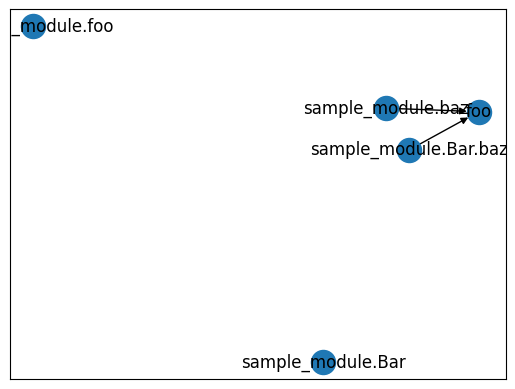

In [2]:
import networkx as nx
import matplotlib.pyplot as plt

G = nx.DiGraph()
for name, info in graph.items():
    G.add_node(name, type=info["type"])
    for callee in info.get("calls", []):
        G.add_edge(name, callee)

nx.draw_networkx(G)
plt.show()